In [2]:
!pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.0/130.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 74.2 MB/s eta 0:00:00


In [3]:
!pip install mplcyberpunk

In [4]:
!pip install colormap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Index(['McLaren', 'Red Bull Racing', 'Ferrari', 'Mercedes', 'RB', 'Williams',
       'Aston Martin', 'Haas F1 Team', 'Alpine', 'Kick Sauber'],
      dtype='object', name='Team')


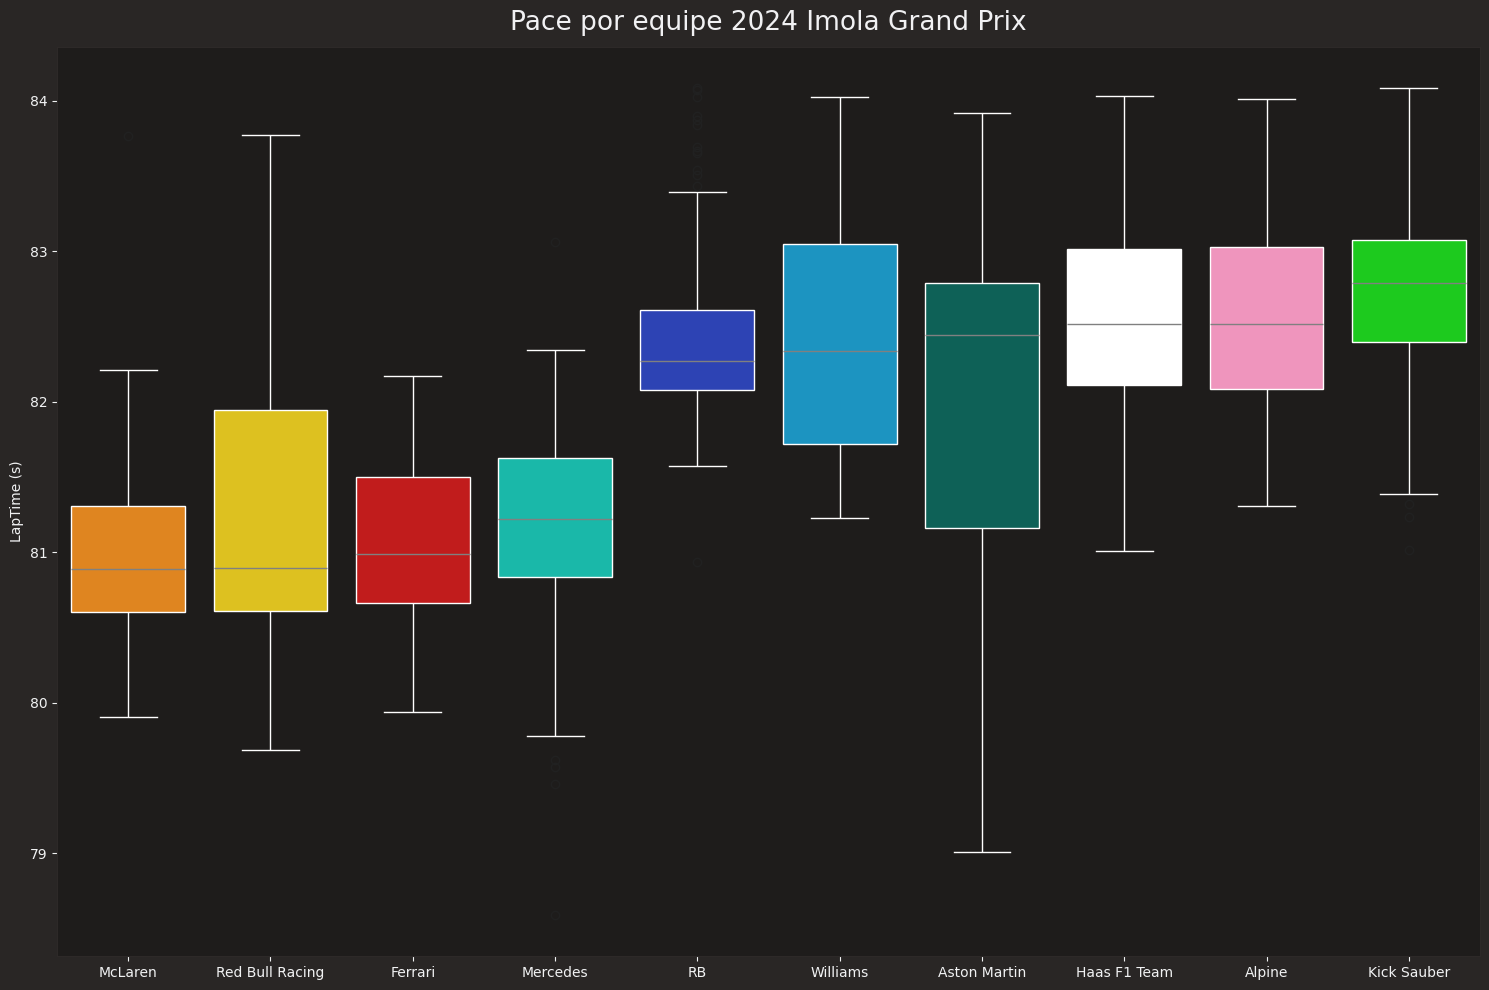

In [72]:
#ritmo por equipe na corrida de IMOLA 2024
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

race = fastf1.get_session(2024, 7, 'R')
race.load()
laps = race.laps.pick_quicklaps()

transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# order the team from the fastest (lowest median lap time) tp slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.team_color(team) for team in team_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("Pace por equipe 2024 Imola Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

Index(['VER', 'NOR', 'LEC', 'PIA', 'SAI', 'RUS', 'HAM', 'ALB', 'PER', 'TSU',
       'RIC', 'STR', 'GAS', 'HUL', 'ALO', 'BOT', 'OCO', 'MAG', 'ZHO', 'SAR'],
      dtype='object', name='Driver')
['VER', 'NOR', 'LEC', 'PIA', 'SAI', 'RUS', 'HAM', 'ALB', 'PER', 'TSU', 'RIC', 'STR', 'GAS', 'HUL', 'ALO', 'BOT', 'OCO', 'MAG', 'ZHO', 'SAR']
{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'IWA': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97'}


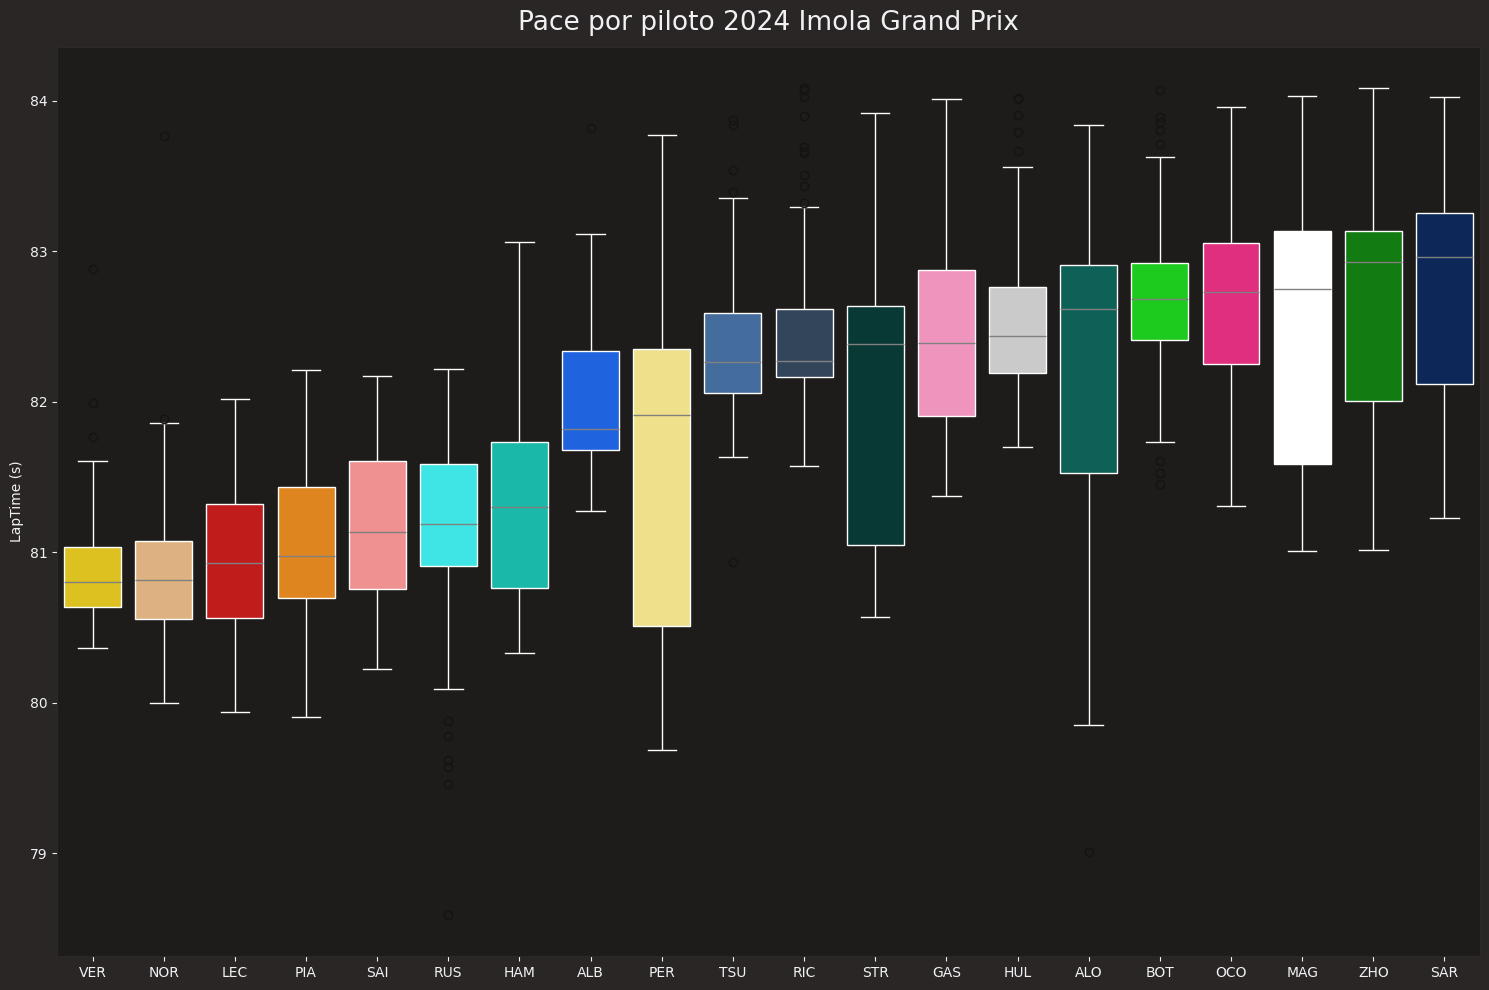

In [73]:
import seaborn as sns
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

# Activate the fastf1 color scheme (and no other modifications)
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

# Load race session data
race = fastf1.get_session(2024, 7, 'R')
race.load()
laps = race.laps.pick_quicklaps()

# Transform laps to get LapTime in seconds
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

# Order the drivers from the fastest (lowest median lap time) to slower
driver_order = (
    transformed_laps[["Driver", "LapTime (s)"]]
    .groupby("Driver")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(driver_order)

# Create the finishing order with driver abbreviations
finishing_order = [race.get_driver(i)["Abbreviation"] for i in driver_order]
print(finishing_order)

# Create a dictionary mapping driver abbreviations to their colors
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

# Make a color palette associating driver names to hex codes
driver_palette = {driver: driver_colors[driver] for driver in finishing_order}

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Driver",
    y="LapTime (s)",
    hue="Driver",
    order=driver_order,
    palette=driver_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("Pace por piloto 2024 Imola Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()


['1', '4', '16', '81', '55', '44', '63', '11', '18', '22', '27', '20', '3', '31', '24', '10', '2', '77', '14', '23']
['VER', 'NOR', 'LEC', 'PIA', 'SAI', 'HAM', 'RUS', 'PER', 'STR', 'TSU', 'HUL', 'MAG', 'RIC', 'OCO', 'ZHO', 'GAS', 'SAR', 'BOT', 'ALO', 'ALB']
{'LEC': '#dc0000', 'SAI': '#ff8181', 'SHW': '#9c0000', 'VER': '#fcd700', 'PER': '#ffec7b', 'DEN': '#907400', 'PIA': '#ff8700', 'NOR': '#eeb370', 'OWA': '#ee6d3a', 'GAS': '#fe86bc', 'OCO': '#ff117c', 'DOO': '#894667', 'BOT': '#00e701', 'ZHO': '#008d01', 'POU': '#004601', 'DEV': '#1e3d61', 'TSU': '#356cac', 'RIC': '#2b4562', 'LAW': '#2b4562', 'HAD': '#1e6176', 'IWA': '#1e6176', 'MAG': '#ffffff', 'HUL': '#cacaca', 'BEA': '#c40000', 'ALO': '#006f62', 'STR': '#00413b', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'VES': '#00a6ff', 'ALB': '#005aff', 'SAR': '#012564', 'OSU': '#1b3d97'}


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.3% of the points cannot be plac

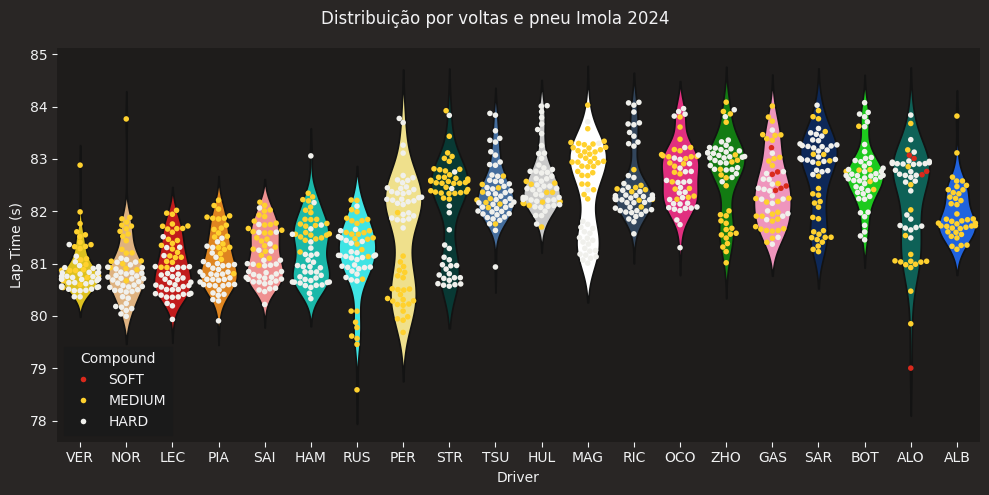

In [79]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

race = fastf1.get_session(2024, "Imola", 'R')
race.load()

point_finishers = race.drivers[:20]
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.COMPOUND_COLORS,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("Distribuição por voltas e pneu Imola 2024")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

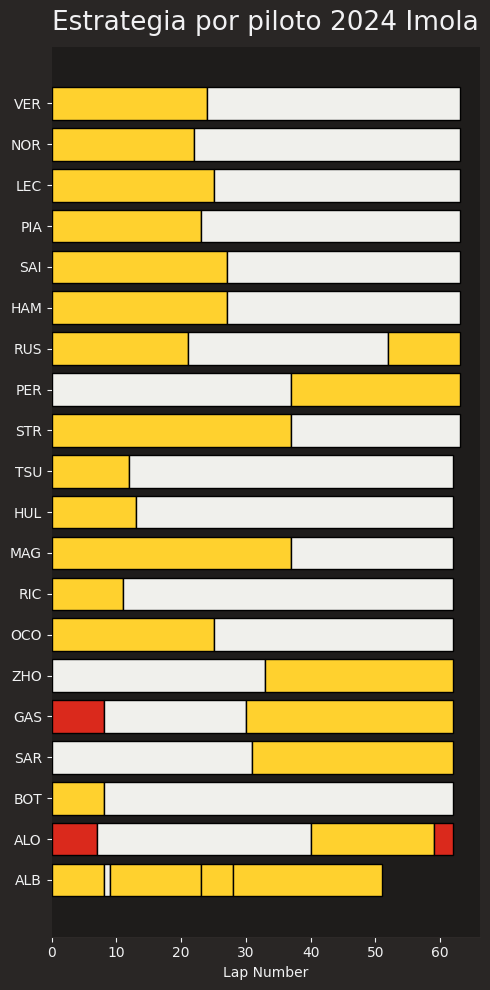

In [78]:
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

session = fastf1.get_session(2024, "Imola", 'R')
session.load()
laps = session.laps
drivers = session.drivers
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()
stints = stints.rename(columns={"LapNumber": "StintLength"})

fig, ax = plt.subplots(figsize=(5, 10))

for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=fastf1.plotting.COMPOUND_COLORS[row["Compound"]],
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("Estrategia por piloto 2024 Imola")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

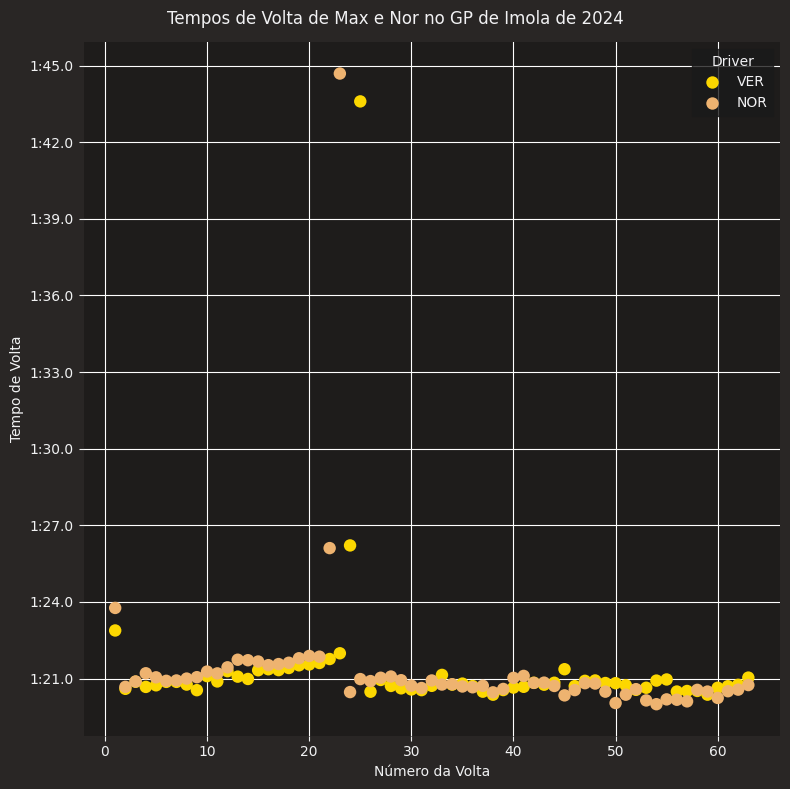

In [75]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Configurações do matplotlib
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# Carrega os dados da corrida de Imola em 2024
race = fastf1.get_session(2024, "Imola", 'R')
race.load()

# Seleciona os 10 primeiros colocados
point_finishers = race.drivers[:2]

# Obtém a ordem de chegada dos pilotos
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]

# Obtém os dados de volta para cada piloto e os armazena em uma lista de DataFrames
driver_laps = [race.laps.pick_driver(driver) for driver in finishing_order]

# Combina todos os DataFrames em um único DataFrame
combined_driver_laps = pd.concat(driver_laps)

# Cria o dicionário de cores do motorista
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# Cria a figura
fig, ax = plt.subplots(figsize=(8, 8))

# Plota o gráfico de dispersão
sns.scatterplot(data=combined_driver_laps,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Driver",
                palette=driver_colors,  # Usa o dicionário de cores do motorista
                s=80,
                linewidth=0,
                legend='auto')

# Define os rótulos dos eixos e o título do gráfico
ax.set_xlabel("Número da Volta")
ax.set_ylabel("Tempo de Volta")
plt.suptitle("Tempos de Volta de Max e Nor no GP de Imola de 2024")

# Inverte o eixo y (o tempo de volta aumenta do topo para a base)
ax.invert_yaxis()

# Ativa as linhas de grade principais
plt.grid(color='w', which='major', axis='both')

# Remove as bordas esquerda e inferior
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


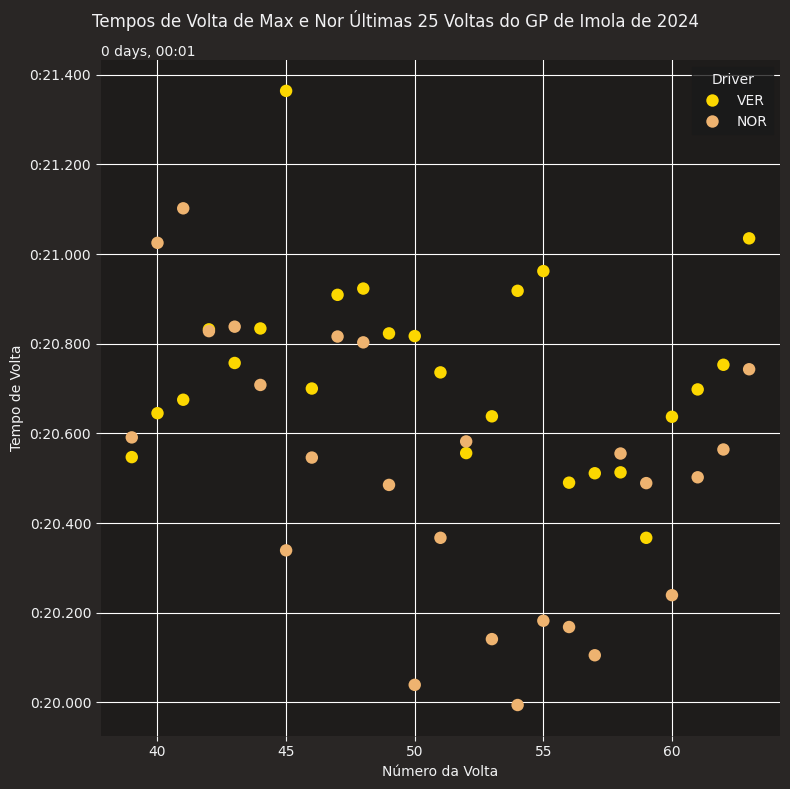

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Configurações do matplotlib
fastf1.plotting.setup_mpl(misc_mpl_mods=False)

# Carrega os dados da corrida de Imola em 2024
race = fastf1.get_session(2024, "Imola", 'R')
race.load()

# Seleciona os 10 primeiros colocados
point_finishers = race.drivers[:2]

# Obtém a ordem de chegada dos pilotos
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]

# Obtém os dados de volta para cada piloto e os armazena em uma lista de DataFrames
driver_laps = [race.laps.pick_driver(driver) for driver in finishing_order]

# Combina todos os DataFrames em um único DataFrame
combined_driver_laps = pd.concat(driver_laps)

# Filtra apenas as últimas 25 voltas
combined_driver_laps_last_25 = combined_driver_laps[combined_driver_laps['LapNumber'] > combined_driver_laps['LapNumber'].max() - 25]

# Cria o dicionário de cores do motorista
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

# Cria a figura
fig, ax = plt.subplots(figsize=(8, 8))

# Plota o gráfico de dispersão
sns.scatterplot(data=combined_driver_laps_last_25,
                x="LapNumber",
                y="LapTime",
                ax=ax,
                hue="Driver",
                palette=driver_colors,  # Usa o dicionário de cores do motorista
                s=80,
                linewidth=0,
                legend='auto')

# Define os rótulos dos eixos e o título do gráfico
ax.set_xlabel("Número da Volta")
ax.set_ylabel("Tempo de Volta")
plt.suptitle("Tempos de Volta de Max e Nor Últimas 25 Voltas do GP de Imola de 2024")

# Inverte o eixo y (o tempo de volta aumenta do topo para a base)
ax.invert_yaxis()

# Ativa as linhas de grade principais
plt.grid(color='w', which='major', axis='both')

# Remove as bordas esquerda e inferior
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


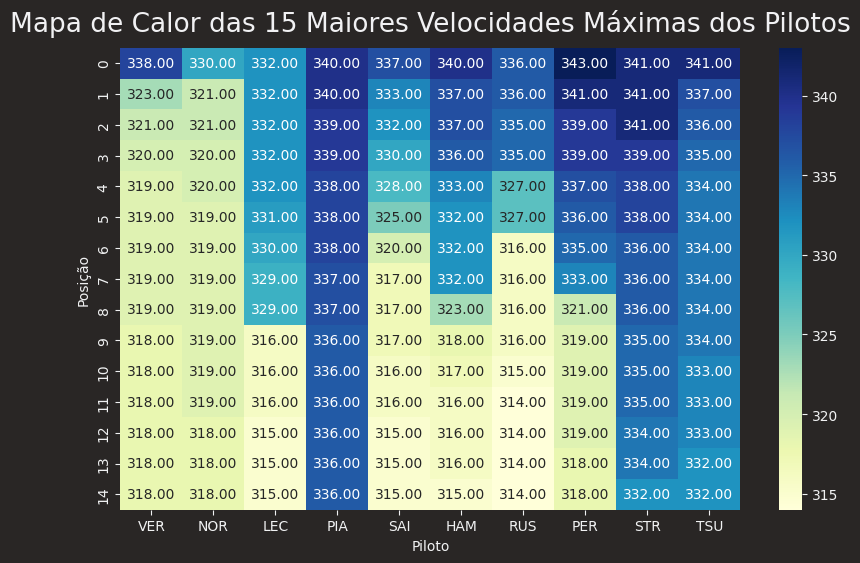

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import logging

race = fastf1.get_session(2024, "Imola", 'R')
race.load()
point_finishers = race.drivers[:10]
#print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
#print(finishing_order)
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
#print(driver_colors)


# Defina o nível de log para um nível mais alto para evitar que os avisos sejam exibidos
logging.getLogger('fastf1').setLevel(logging.ERROR)

# Dicionário para armazenar as 15 maiores velocidades máximas de cada piloto
dados = {}

# Iterar sobre cada piloto na lista finishing_order
for piloto in finishing_order:
    # Lista para armazenar as velocidades máximas do piloto
    velocidades_piloto = []

    # Selecionar as voltas do piloto
    laps_driver = race.laps.pick_driver(piloto)

    # Iterar sobre todas as voltas do piloto
    for volta in range(1, 63):  # Supondo que o número total de voltas seja de 1 a 57
        # Selecionar a volta específica do piloto
        volta_driver = laps_driver.pick_laps(volta)

        # Retornar a telemetria e adicionar a coluna de distância
        telemetry_driver = volta_driver.get_telemetry().add_distance()

        # Adicionar a maior velocidade do piloto nesta volta à lista de velocidades do piloto
        velocidades_piloto.append(telemetry_driver.Speed.max())

    # Ordenar as velocidades máximas do piloto em ordem decrescente e selecionar as 15 maiores
    velocidades_piloto = sorted(velocidades_piloto, reverse=True)[:15]

    # Armazenar as 15 maiores velocidades máximas do piloto no dicionário
    dados[piloto] = velocidades_piloto

# Criar um DataFrame com os dados das 15 maiores velocidades máximas de cada piloto
df_velocidades = pd.DataFrame(dados)

# Plotar um mapa de calor usando seaborn
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_velocidades, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mapa de Calor das 15 Maiores Velocidades Máximas dos Pilotos")
plt.xlabel("Piloto")
plt.ylabel("Posição")
plt.show()
